In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from matplotlib.patches import Circle
import os
import pickle
from scipy.stats import mannwhitneyu, ttest_ind, kruskal, f_oneway
from statannotations.Annotator import Annotator
from itertools import combinations
import sys
sys.path.append('../scripts') 
from functions import *
from config import nutrient_info, conversion_factors

In [5]:
df_food = pd.read_csv("../data/df_food_filtered_with_food_group.csv",index_col=0)
with open("../data/df_food_openfoodfacts_merged.pkl", "rb") as f:
    df_food_openfoodfacts = pickle.load(f, encoding="latin1")

C:\Users\Sophie\AppData\Local\Temp\ipykernel_6544\2857174756.py:1: DtypeWarning: Columns (2,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food = pd.read_csv("../data/df_food_filtered_with_food_group.csv",index_col=0)


In [6]:
df_food = df_food[df_food["eaten_quantity_in_gram"] > 0]
df_food = df_food[df_food["energy_kcal_eaten"] > 0]

In [7]:
qualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'qualifying'}
disqualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'disqualifying'}

In [8]:

df_food_ratio = calculate_ratios(df_food.fillna(0), list(nutrient_info.keys()))

In [9]:
df_food_ratio.describe()

,food_id,dish_id,eaten_quantity,eaten_at_utc_offset,media_count,fallback_food_id,standard_portion_quantity,specific_gravity,alcohol,all_trans_retinol_equivalents_activity,...,potassium_eaten_ratio,zinc_eaten_ratio,fiber_eaten_ratio,protein_eaten_ratio,fat_eaten_ratio,fatty_acids_saturated_eaten_ratio,cholesterol_eaten_ratio,sugar_eaten_ratio,sodium_eaten_ratio,salt_eaten_ratio
count,317780.000000,317780.000000,317780.000000,317780.000000,317780.000000,317780.000000,317780.000000,317780.000000,317780.000000,317780.000000,...,317780.000000,317780.000000,317780.000000,317780.000000,317780.000000,317780.000000,317780.000000,317780.000000,317780.000000,317780.000000
mean,2960.136056,205447.454720,60.336813,94.096041,0.827680,190.904594,73.409149,0.000473,0.314320,44.279484,...,0.020262,0.046292,0.047827,0.086370,0.057891,0.074842,0.042935,0.029102,0.058396,0.036103
std,4094.972611,125854.699478,70.699020,37.354649,0.377659,721.153330,69.880747,0.022610,2.076871,245.160857,...,0.035741,0.131930,0.080672,0.153958,0.088950,0.145757,0.165099,0.054352,0.127527,0.099142
min,13.000000,642.000000,0.006300,-420.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1212.000000,95565.750000,10.000000,60.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.005652,0.001538,0.000000,0.000000,0.000960,0.000481,0.000000
50%,2022.000000,193739.000000,40.000000,120.000000,1.000000,0.000000,50.000000,0.000000,0.000000,0.000000,...,0.006383,0.007500,0.018000,0.030435,0.016154,0.010909,0.000000,0.007400,0.003750,0.000000
75%,2741.000000,328554.250000,100.000000,120.000000,1.000000,0.000000,110.000000,0.000000,0.000000,0.000000,...,0.027234,0.050000,0.067000,0.102826,0.084615,0.085364,0.000667,0.032480,0.064167,0.015000
max,46590.000000,428329.000000,3000.000000,240.000000,1.000000,10626.000000,400.000000,1.100000,45.683100,13900.000000,...,4.659574,9.375000,4.238080,4.686957,2.310897,6.227273,5.384800,4.200000,16.800000,4.583333


In [10]:
df_food_scaled = scale(df_food_ratio.fillna(0), list(nutrient_info.keys()), scaling_factor=2000)

In [11]:
df_food_scaled

,food_id,barcode,dish_id,eaten_quantity,eaten_unit,subject_key,eaten_at,eaten_at_utc_offset,media_count,food_group_cname,...,potassium_eaten_ratio_scaled,zinc_eaten_ratio_scaled,fiber_eaten_ratio_scaled,protein_eaten_ratio_scaled,fat_eaten_ratio_scaled,fatty_acids_saturated_eaten_ratio_scaled,cholesterol_eaten_ratio_scaled,sugar_eaten_ratio_scaled,sodium_eaten_ratio_scaled,salt_eaten_ratio_scaled
0,13,0,335994,110.00,g,bjsqab,2022-02-15 18:06:27,60,1,dairy_products_meat_fish_eggs_tofu,...,0.856776,7.214765,0.000000,7.936971,0.774393,1.037218,3.93736,0.000000,0.430649,0.000000
3,13,0,411384,100.00,g,erv9jd,2023-01-18 13:08:53,60,1,dairy_products_meat_fish_eggs_tofu,...,0.856776,7.214765,0.000000,7.936971,0.774393,1.037218,3.93736,0.000000,0.430649,0.000000
4,25,0,202497,35.00,g,6ata8r,2021-03-30 13:52:23,120,1,vegetables_fruits,...,1.084689,0.490196,2.196078,0.341006,0.100553,0.000000,0.00000,3.545098,0.032680,0.000000
5,25,0,283397,35.00,g,uzbc9s,2021-10-21 10:09:09,120,1,vegetables_fruits,...,1.084689,0.490196,2.196078,0.341006,0.100553,0.000000,0.00000,3.545098,0.032680,0.000000
6,25,0,266679,40.00,g,fvh6kf,2021-09-19 10:14:35,120,1,vegetables_fruits,...,1.084689,0.490196,2.196078,0.341006,0.100553,0.000000,0.00000,3.545098,0.032680,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514955,46573,4104420237155,426463,16.00,g,pgeyqb,2023-03-13 15:16:39,60,0,unclassified,...,0.000000,0.000000,0.886544,0.917747,0.202963,0.263852,0.00000,0.633245,0.000000,0.026385
514956,46573,4104420237155,426838,16.00,g,pgeyqb,2023-03-13 15:30:54,60,0,unclassified,...,0.000000,0.000000,0.886544,0.917747,0.202963,0.263852,0.00000,0.633245,0.000000,0.026385
514957,46575,5411188102809,423445,100.00,g,kmxhmz,2023-02-25 08:18:11,60,1,unclassified,...,0.000000,0.000000,1.315068,2.144133,0.702494,0.373599,0.00000,2.060274,0.000000,0.958904
514958,46588,7618500940806,425332,100.00,ml,pgeyqb,2023-03-06 18:31:08,60,1,unclassified,...,0.000000,0.000000,0.000000,1.185771,0.000000,0.000000,0.00000,2.909091,0.000000,15.151515


In [12]:
df_food_ratio['QI'] = df_food_ratio.apply(compute_index, axis=1, nutrient_cols=qualifying_nutrients)
df_food_scaled['QI'] = df_food_ratio.apply(compute_index, axis=1, nutrient_cols=qualifying_nutrients)

In [13]:
df_food_ratio['DI'] = df_food_ratio.apply(compute_index, axis=1, nutrient_cols=disqualifying_nutrients)
df_food_scaled['DI'] = df_food_ratio.apply(compute_index, axis=1, nutrient_cols=disqualifying_nutrients)

In [14]:
df_food_ratio['NB'] = df_food_scaled.apply(compute_nb, axis=1, nutrient_cols=qualifying_nutrients)
df_food_scaled['NB'] = df_food_scaled.apply(compute_nb, axis=1, nutrient_cols=qualifying_nutrients)

In [15]:
df_food_scaled.to_csv('df_food_scaled.csv', index=False)

In [16]:
df_food_ratio

,food_id,barcode,dish_id,eaten_quantity,eaten_unit,subject_key,eaten_at,eaten_at_utc_offset,media_count,food_group_cname,...,protein_eaten_ratio,fat_eaten_ratio,fatty_acids_saturated_eaten_ratio,cholesterol_eaten_ratio,sugar_eaten_ratio,sodium_eaten_ratio,salt_eaten_ratio,QI,DI,NB
0,13,0,335994,110.00,g,bjsqab,2022-02-15 18:06:27,60,1,dairy_products_meat_fish_eggs_tofu,...,0.650435,0.063462,0.085000,0.322667,0.00000,0.035292,0.000000,2.624950,1.029937,70.138183
3,13,0,411384,100.00,g,erv9jd,2023-01-18 13:08:53,60,1,dairy_products_meat_fish_eggs_tofu,...,0.591304,0.057692,0.077273,0.293333,0.00000,0.032083,0.000000,2.624950,1.029937,70.138183
4,25,0,202497,35.00,g,6ata8r,2021-03-30 13:52:23,120,1,vegetables_fruits,...,0.003043,0.000897,0.000000,0.000000,0.03164,0.000292,0.000000,1.102941,0.613055,65.021462
5,25,0,283397,35.00,g,uzbc9s,2021-10-21 10:09:09,120,1,vegetables_fruits,...,0.003043,0.000897,0.000000,0.000000,0.03164,0.000292,0.000000,1.102941,0.613055,65.021462
6,25,0,266679,40.00,g,fvh6kf,2021-09-19 10:14:35,120,1,vegetables_fruits,...,0.003478,0.001026,0.000000,0.000000,0.03616,0.000333,0.000000,1.102941,0.613055,65.021462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514955,46573,4104420237155,426463,16.00,g,pgeyqb,2023-03-13 15:16:39,60,0,unclassified,...,0.027826,0.006154,0.008000,0.000000,0.01920,0.000000,0.000800,0.094963,0.187741,9.496266
514956,46573,4104420237155,426838,16.00,g,pgeyqb,2023-03-13 15:30:54,60,0,unclassified,...,0.027826,0.006154,0.008000,0.000000,0.01920,0.000000,0.000800,0.094963,0.187741,9.496266
514957,46575,5411188102809,423445,100.00,g,kmxhmz,2023-02-25 08:18:11,60,1,unclassified,...,0.078261,0.025641,0.013636,0.000000,0.07520,0.000000,0.035000,1.002889,0.682545,31.578947
514958,46588,7618500940806,425332,100.00,ml,pgeyqb,2023-03-06 18:31:08,60,1,unclassified,...,0.013043,0.000000,0.000000,0.000000,0.03200,0.000000,0.166667,0.827959,3.010101,10.526316


In [17]:
df_food_scaled[['QI', 'DI','NB', 'combined_name', 'food_group']].groupby('food_group').median(numeric_only=True).sort_values('QI')

,QI,DI,NB
food_group,,,
alcoholic_beverages,0.040134,0.007668,4.013378
sweetened_beverages,0.044006,0.664300,4.400634
others,0.110543,0.666667,5.715176
soups_sauces_condiments,0.123749,1.068889,6.739500
salty_snacks,0.128240,0.535766,10.526316
cooked_grains_pasta,0.142698,0.517566,9.851552
sweets_desserts,0.165655,0.852030,13.304318
butter_margarine_spreads,0.224674,1.837749,11.362562
vegetable_fruit_juices,0.236339,0.626646,23.179070


In [18]:
df_vegetable = df_food_scaled[df_food_scaled['food_group'] == 'vegetables']

In [19]:
df_vegetable.drop_duplicates('combined_name')

,food_id,barcode,dish_id,eaten_quantity,eaten_unit,subject_key,eaten_at,eaten_at_utc_offset,media_count,food_group_cname,...,protein_eaten_ratio_scaled,fat_eaten_ratio_scaled,fatty_acids_saturated_eaten_ratio_scaled,cholesterol_eaten_ratio_scaled,sugar_eaten_ratio_scaled,sodium_eaten_ratio_scaled,salt_eaten_ratio_scaled,QI,DI,NB
126,50,0,4055,40.0,g,k3pnhy,2019-02-14 18:57:30,60,1,vegetables_fruits,...,1.449275,0.044984,0.000000,0.0,2.947368,0.847953,0.000000,1.767673,0.640051,73.609462
1066,116,0,100802,25.0,g,upybs2,2020-03-12 18:29:00,60,1,vegetables_fruits,...,4.202899,0.341880,0.303030,0.0,1.173333,0.305556,0.000000,8.303348,0.353967,84.210526
1529,143,0,261362,100.0,g,dradpm,2021-09-06 10:46:40,120,1,vegetables_fruits,...,0.954401,0.187617,0.000000,0.0,2.770732,0.508130,0.000000,1.974445,0.577747,79.506118
2440,148,0,83560,60.0,g,r2wkvx,2019-12-07 21:34:54,60,1,vegetables_fruits,...,2.717391,0.160256,0.000000,0.0,1.600000,5.208333,0.000000,4.448798,1.161432,84.210526
2454,150,0,209797,40.0,g,jb3nq3,2021-04-18 17:09:04,120,1,vegetables_fruits,...,2.318841,0.256410,0.000000,0.0,1.066667,2.361111,0.000000,3.805110,0.614031,84.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513903,33127,7627534181055,385720,52.0,g,kgbtut,2022-09-20 16:42:32,120,0,unclassified,...,1.234568,0.633112,0.561167,0.0,1.362963,0.000000,2.057613,0.215724,0.769143,10.526316
513969,33189,7613312295588,388048,250.0,g,kgbtut,2022-09-26 16:53:22,120,0,unclassified,...,1.708075,0.457875,0.000000,0.0,0.800000,0.000000,7.738095,0.495914,1.499328,10.526316
514352,33518,7627534612115,397015,200.0,g,wjtpa5,2022-11-06 21:49:57,60,0,unclassified,...,4.347826,0.000000,0.000000,0.0,1.333333,0.000000,0.000000,0.720061,0.222222,10.526316
514667,46071,7613312273760,406384,250.0,g,48wbxy,2022-12-08 11:09:58,60,0,unclassified,...,2.879729,0.432900,0.236128,0.0,0.644156,0.000000,1.991342,0.397634,0.550754,10.526316


# Vegetables with QI > 10

In [20]:
high_qi_vegetable = df_vegetable[df_vegetable['QI'] > 10].drop_duplicates('combined_name').sort_values('QI', ascending=False)

In [21]:
high_qi_vegetable[['combined_name', 'eaten_quantity', 'QI', 'DI', 'NB']]

,combined_name,eaten_quantity,QI,DI,NB
485667,Coop Naturaplan Betty Bossi Organic mung bean ...,100.0,41.475964,1.335664,78.947368
465370,Pancho Villa Sliced Jalapeños,29.0,30.125501,4.324511,57.894737
468199,Valenzi Eierschwämme klein,20.0,22.977611,4.993214,89.473684
26934,Cress,20.0,14.718811,0.856397,84.210526
464880,M Classic Tagliati Paris mushrooms,40.0,13.003809,2.974769,88.479532
484235,Epinards,50.0,11.494326,0.613869,84.210526
4599,"Spinach, raw",35.0,11.494326,0.613869,84.210526
491581,"Coop - Naturaplan - Alfalfa, Rucola, Sprossen",80.0,11.207810,0.248538,82.640813
9942,"Bell pepper, green, stewed, without addition o...",60.0,10.752978,0.446409,77.170023
499594,Surinver - Poivron Type Padron,15.0,10.752978,0.446409,77.170023


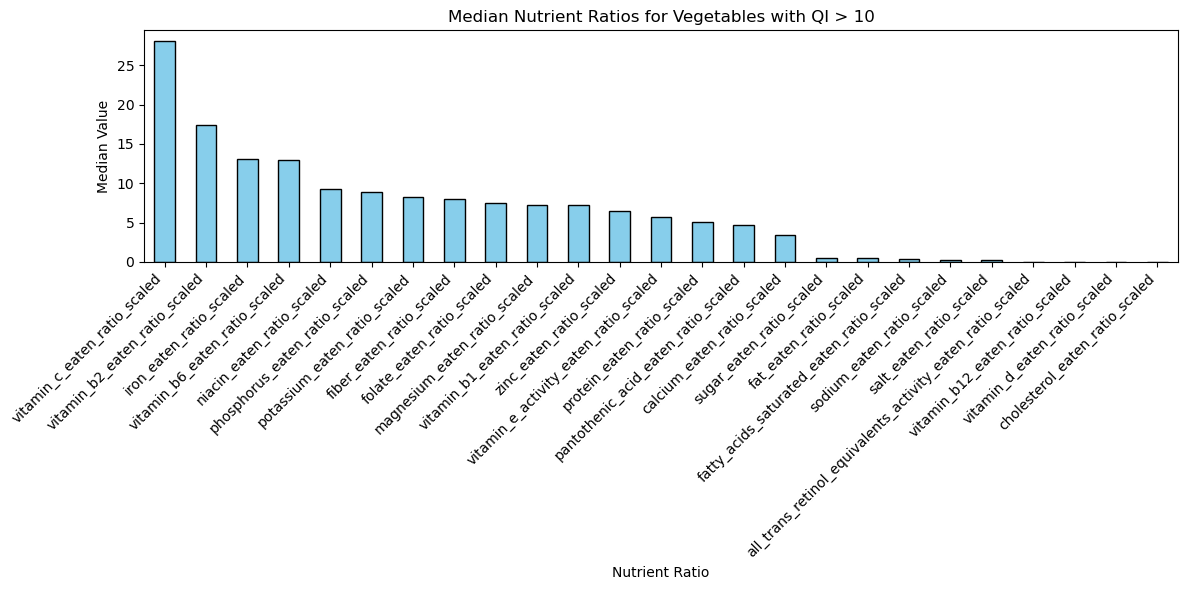

In [22]:
ratio_cols = [i for i in high_qi_vegetable.columns if '_ratio_scaled' in i]
median_ratios = high_qi_vegetable[ratio_cols].median().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
median_ratios.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Median Nutrient Ratios for Vegetables with QI > 10")
plt.xlabel("Nutrient Ratio")
plt.ylabel("Median Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
df_corr = high_qi_vegetable[ratio_cols + ['QI']]
corr = df_corr.corr()['QI']
corr.sort_values(ascending=True)

vitamin_c_eaten_ratio_scaled                                -0.484837
sodium_eaten_ratio_scaled                                   -0.236101
fat_eaten_ratio_scaled                                      -0.145211
folate_eaten_ratio_scaled                                   -0.116163
protein_eaten_ratio_scaled                                  -0.058795
fiber_eaten_ratio_scaled                                    -0.015551
vitamin_d_eaten_ratio_scaled                                 0.010683
pantothenic_acid_eaten_ratio_scaled                          0.126675
calcium_eaten_ratio_scaled                                   0.195757
salt_eaten_ratio_scaled                                      0.319846
sugar_eaten_ratio_scaled                                     0.366595
niacin_eaten_ratio_scaled                                    0.419759
vitamin_b2_eaten_ratio_scaled                                0.618648
iron_eaten_ratio_scaled                                      0.631617
vitamin_b6_eaten_rat

As we can see, the beta carotene is the micronutrient with the most correlation with QI. Magnesium, calcium, folate and vitamin b1 should also be factor to this change

## Beta carotene

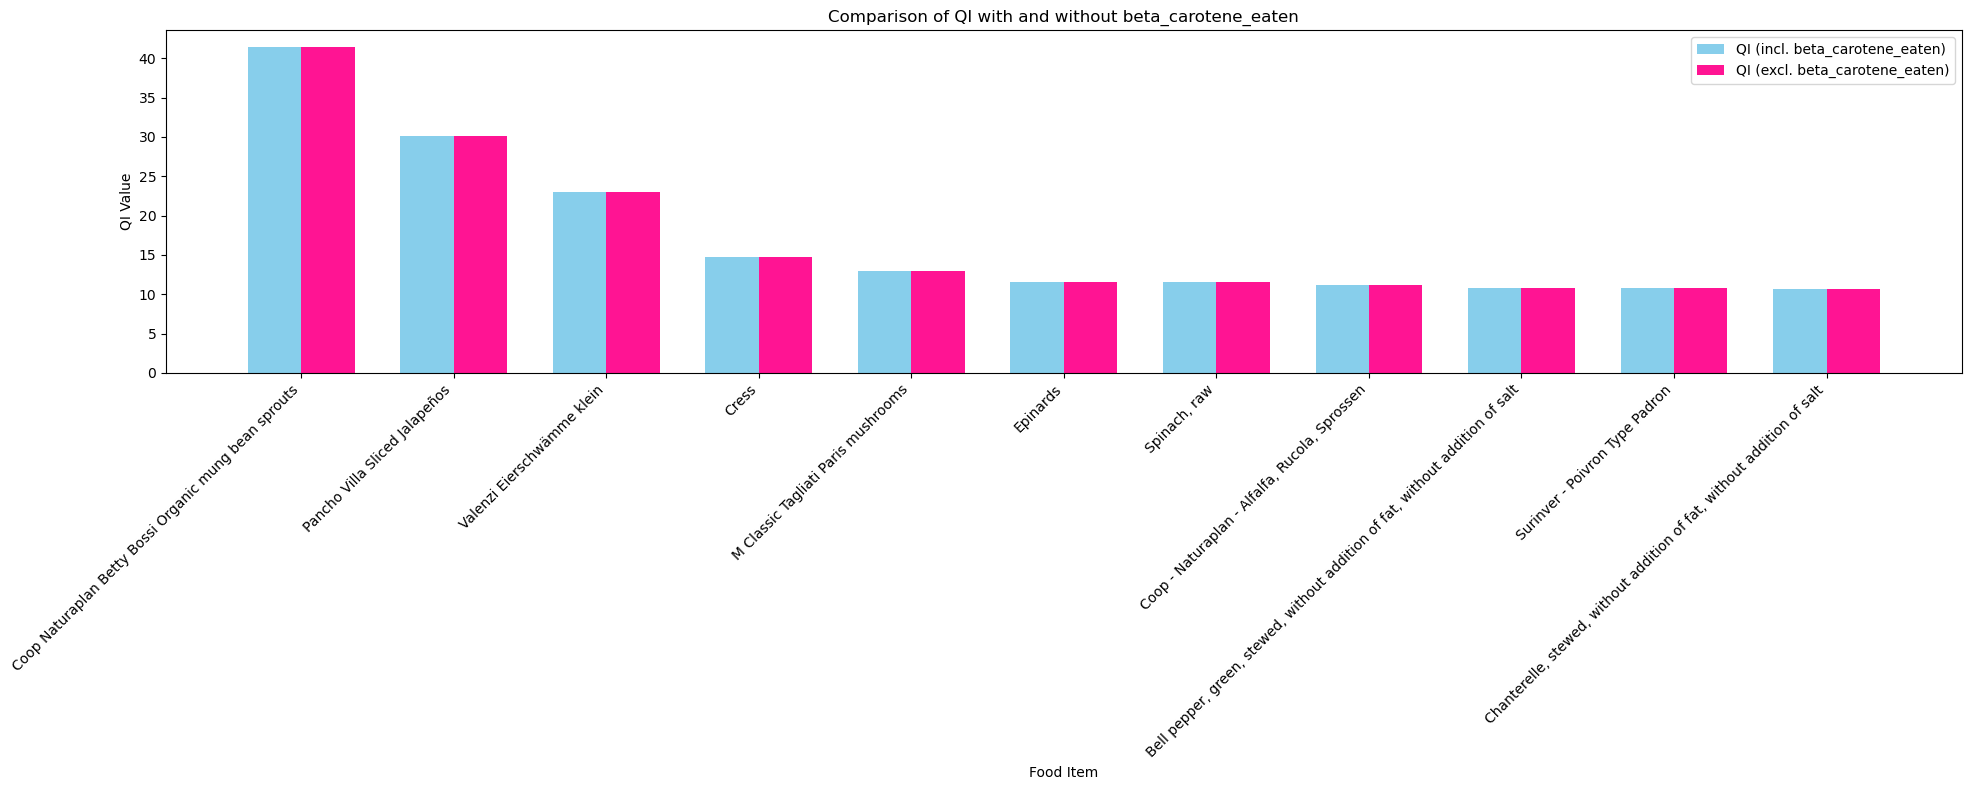

,combined_name,QI,QI_excl_beta_carotene_eaten,QI_diff,QI_pct_change
485667,Coop Naturaplan Betty Bossi Organic mung bean ...,41.475964,41.475964,0.0,0.0
465370,Pancho Villa Sliced Jalapeños,30.125501,30.125501,0.0,0.0
468199,Valenzi Eierschwämme klein,22.977611,22.977611,0.0,0.0
26934,Cress,14.718811,14.718811,0.0,0.0
464880,M Classic Tagliati Paris mushrooms,13.003809,13.003809,0.0,0.0
484235,Epinards,11.494326,11.494326,0.0,0.0
4599,"Spinach, raw",11.494326,11.494326,0.0,0.0
491581,"Coop - Naturaplan - Alfalfa, Rucola, Sprossen",11.207810,11.207810,0.0,0.0
9942,"Bell pepper, green, stewed, without addition o...",10.752978,10.752978,0.0,0.0
499594,Surinver - Poivron Type Padron,10.752978,10.752978,0.0,0.0


In [24]:
df_vegetable_beta_carotene = compare_qi_excluding_nutrient(df=high_qi_vegetable, nutrient_to_exclude='beta_carotene_eaten', qualifying_nutrients=qualifying_nutrients)

df_vegetable_beta_carotene

Overall, beta-carotene is the micronutrient that most strongly influences the QI value. I tested all the other qualifying nutrients, and they only slightly changed the value, remained the same, or even increased the QI. I will perform a more detailed analysis on specific food items where the elimination of beta-carotene alone was not sufficient.

### Aberrant values analysis

In [25]:
high_qi_vegetable[high_qi_vegetable['combined_name'] == 'Coop Naturaplan Betty Bossi Organic mung bean sprouts'][[i for i in high_qi_vegetable.columns if '_ratio_scaled' in i]].T

,485667
folate_eaten_ratio_scaled,27.500000
niacin_eaten_ratio_scaled,9.230769
pantothenic_acid_eaten_ratio_scaled,23.076923
vitamin_b2_eaten_ratio_scaled,41.958042
vitamin_b1_eaten_ratio_scaled,147.435897
all_trans_retinol_equivalents_activity_eaten_ratio_scaled,0.000000
vitamin_b12_eaten_ratio_scaled,0.000000
vitamin_b6_eaten_ratio_scaled,94.674556
vitamin_c_eaten_ratio_scaled,0.000000
vitamin_d_eaten_ratio_scaled,0.000000


In [26]:
"""
row = high_qi_vegetable[high_qi_vegetable['combined_name'] == 'Coop Naturaplan Betty Bossi Organic mung bean sprouts'].iloc[0]

exclude_list = ['vitamin_b6_eaten', 'vitamin_b1_eaten', 'phospharus_eaten', 'zinc_eaten', 'magnesium_eaten', 'vitamin_b2_eaten']

qi_excl = compute_qi_excluding_multiple(row, qualifying_nutrients, exclude_list, scaling_factor=2000)
print(f"QI excluding {exclude_list}: {qi_excl:.2f}")"
"""

'\nrow = high_qi_vegetable[high_qi_vegetable[\'combined_name\'] == \'Coop Naturaplan Betty Bossi Organic mung bean sprouts\'].iloc[0]\n\nexclude_list = [\'vitamin_b6_eaten\', \'vitamin_b1_eaten\', \'phospharus_eaten\', \'zinc_eaten\', \'magnesium_eaten\', \'vitamin_b2_eaten\']\n\nqi_excl = compute_qi_excluding_multiple(row, qualifying_nutrients, exclude_list, scaling_factor=2000)\nprint(f"QI excluding {exclude_list}: {qi_excl:.2f}")"\n'

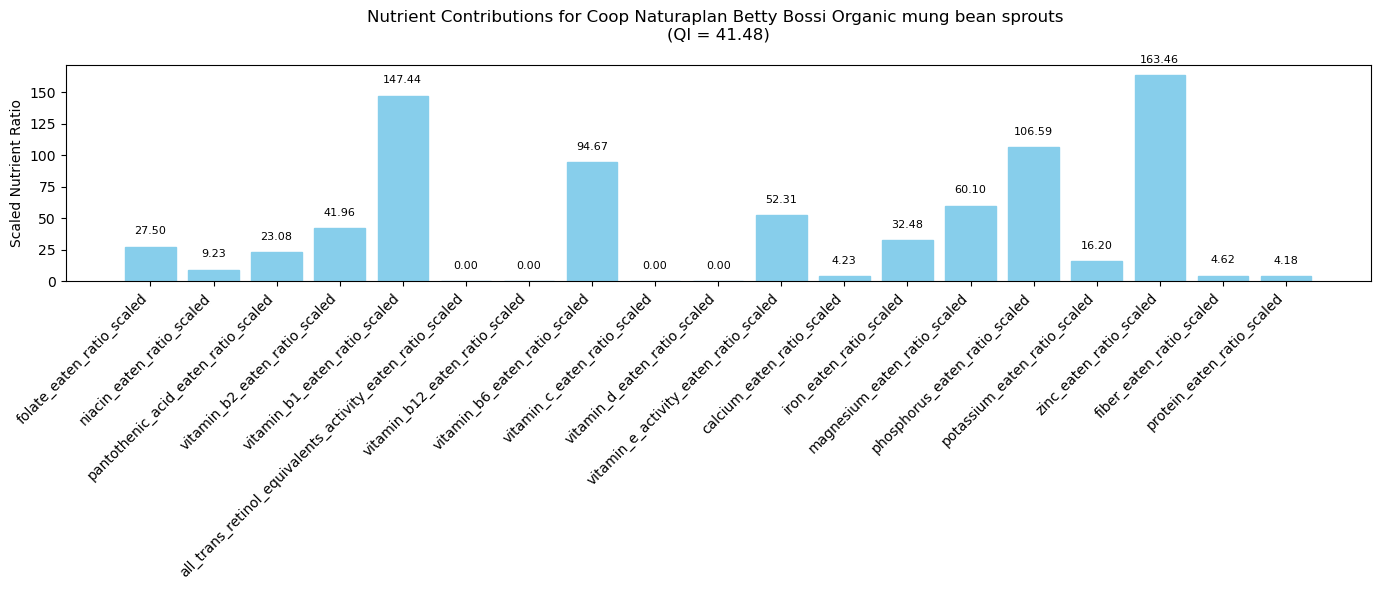

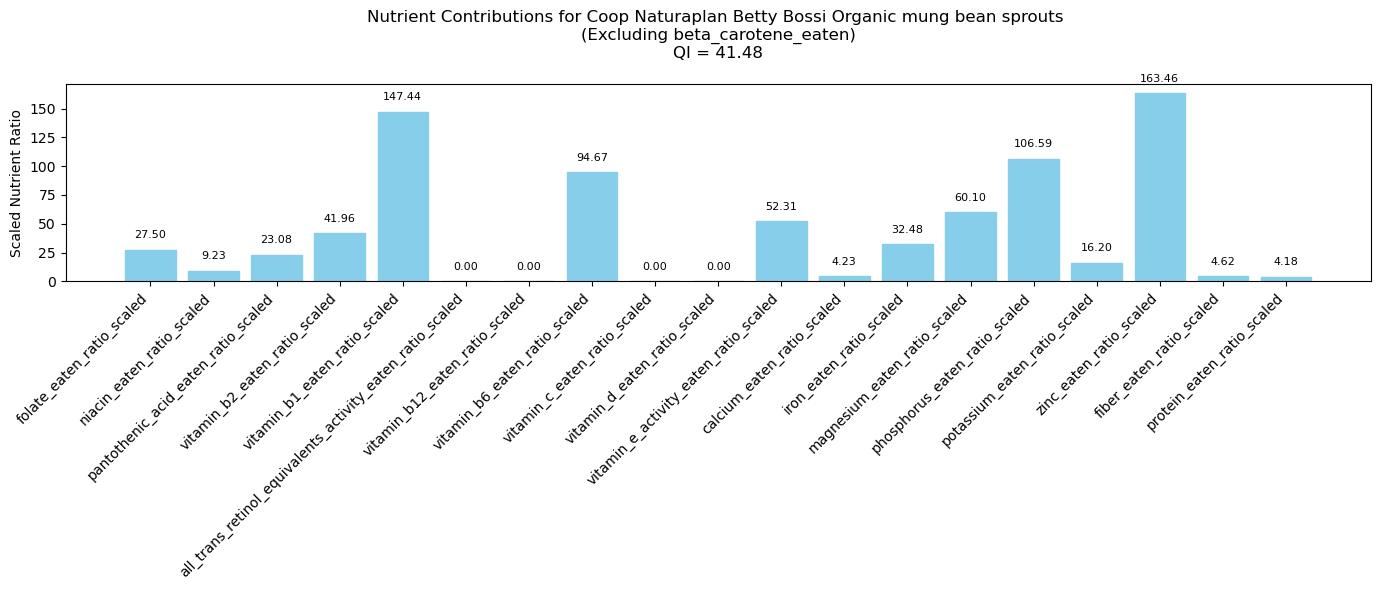

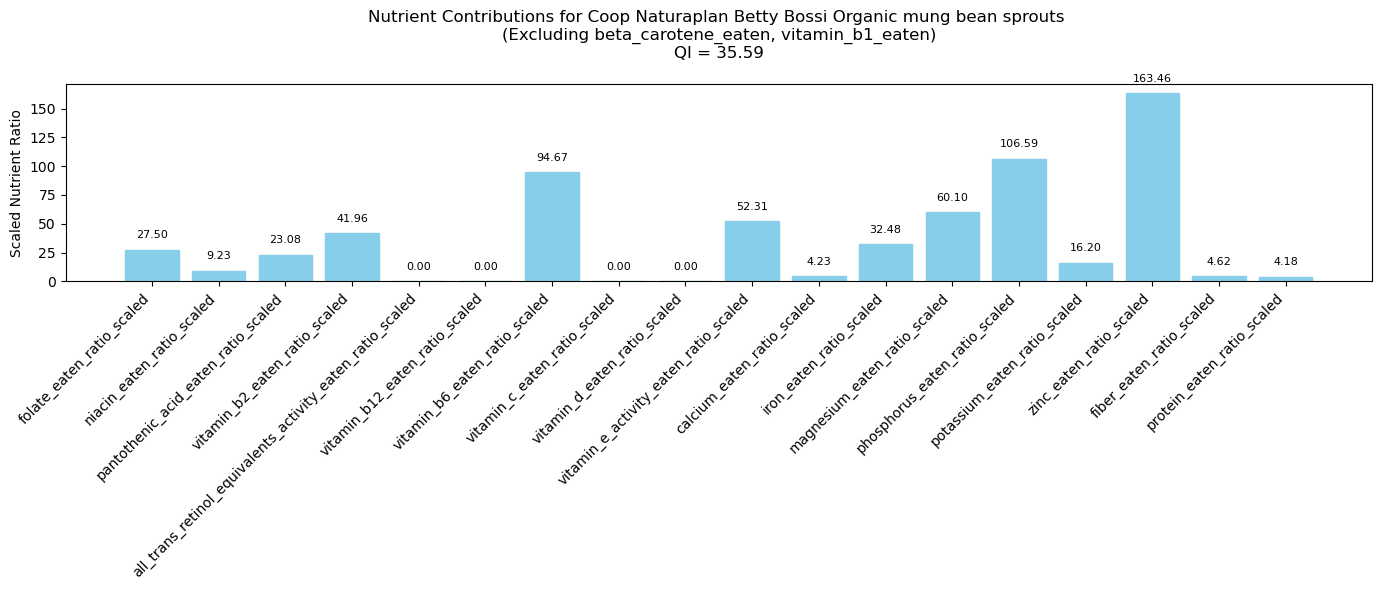

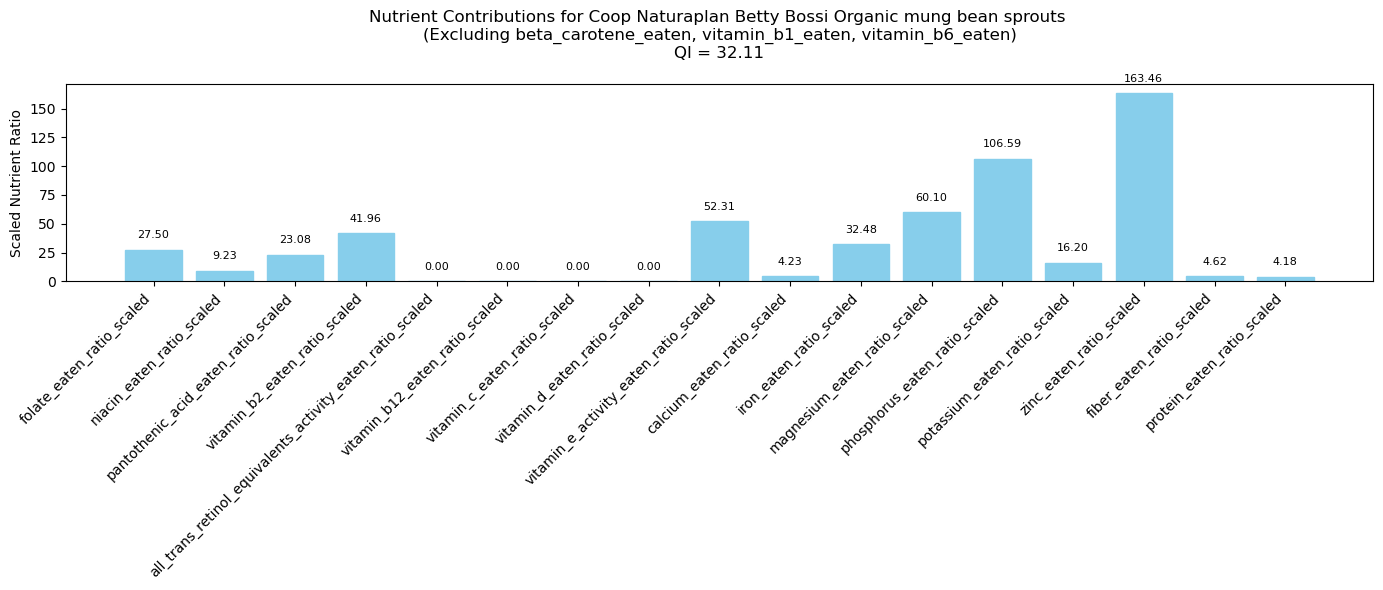

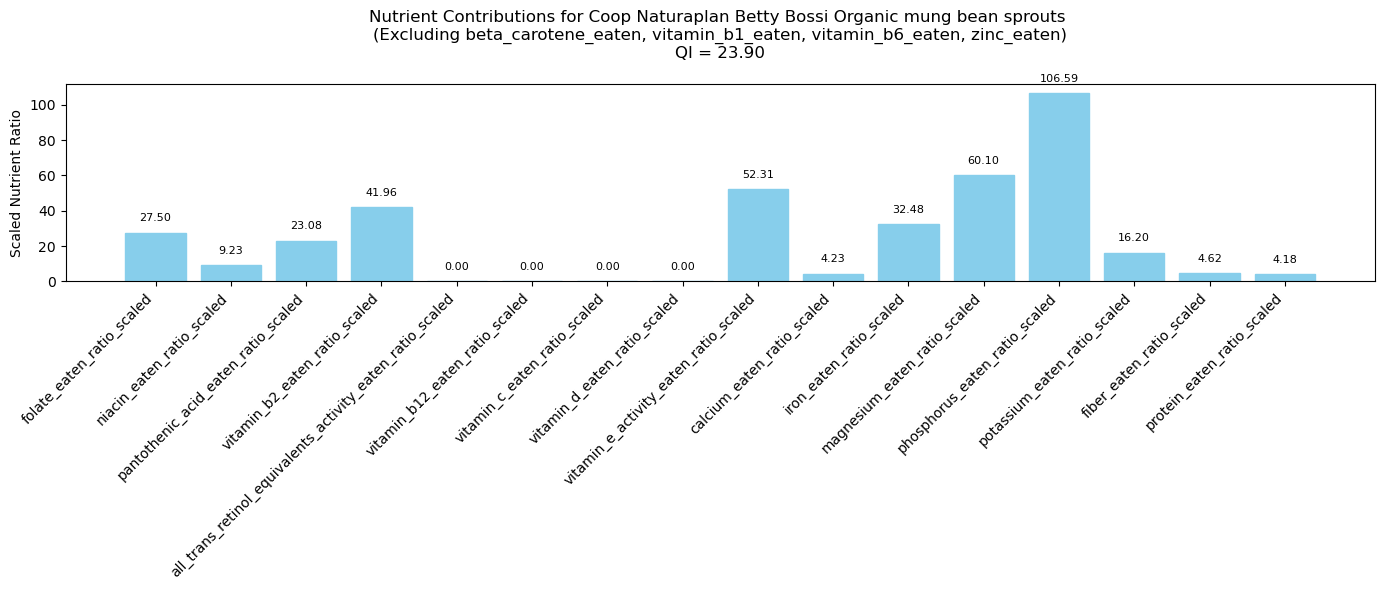

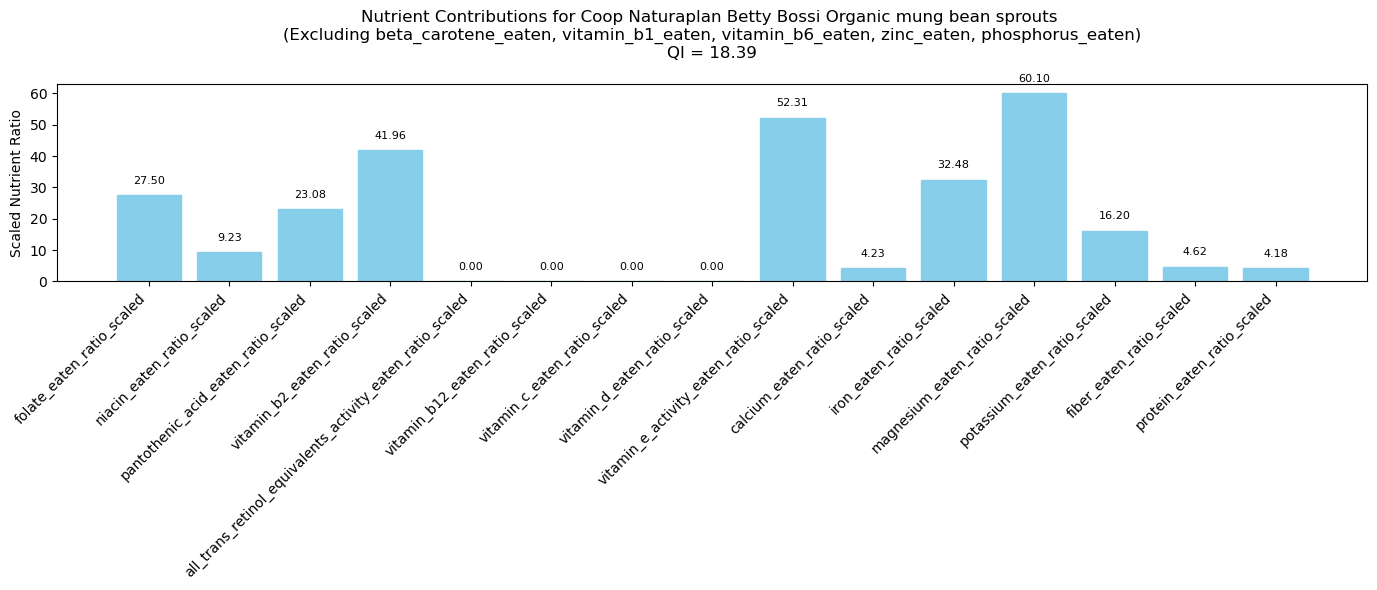

In [27]:
food_item = high_qi_vegetable[high_qi_vegetable['combined_name'] == 'Coop Naturaplan Betty Bossi Organic mung bean sprouts'].iloc[0]

plot_nutrient_contributions_with_qi(food_item, qualifying_nutrients)
plot_nutrient_contributions_with_qi(food_item, qualifying_nutrients, exclude_list=['beta_carotene_eaten'])
plot_nutrient_contributions_with_qi(food_item, qualifying_nutrients, exclude_list=['beta_carotene_eaten', 'vitamin_b1_eaten'])
plot_nutrient_contributions_with_qi(food_item, qualifying_nutrients, exclude_list=['beta_carotene_eaten', 'vitamin_b1_eaten', 'vitamin_b6_eaten'])
plot_nutrient_contributions_with_qi(food_item, qualifying_nutrients, exclude_list=['beta_carotene_eaten', 'vitamin_b1_eaten', 'vitamin_b6_eaten', 'zinc_eaten'])
plot_nutrient_contributions_with_qi(food_item, qualifying_nutrients, exclude_list=['beta_carotene_eaten', 'vitamin_b1_eaten', 'vitamin_b6_eaten', 'zinc_eaten', 'phosphorus_eaten'])

In [28]:
food_item = high_qi_vegetable[high_qi_vegetable['combined_name'] == 'Coop Naturaplan Betty Bossi Organic mung bean sprouts'].iloc[0]
qi_including = food_item['QI']
results = []

for nutr in qualifying_nutrients:
    qi_excluding = compute_qi_excluding(food_item, qualifying_nutrients, exclude=nutr, scaling_factor=2000)
    abs_diff = qi_including - qi_excluding
    pct_diff = (abs_diff / qi_including) * 100
    results.append({
        'Nutrient Excluded': nutr,
        'QI (incl.)': qi_including,
        'QI (excl.)': qi_excluding,
        'Absolute Change': abs_diff,
        'Percent Change': pct_diff
    })


df_results = pd.DataFrame(results)
df_results.sort_values('Absolute Change', ascending=False)

,Nutrient Excluded,QI (incl.),QI (excl.),Absolute Change,Percent Change
16,zinc_eaten,41.475964,34.698987,6.776976,16.339527
4,vitamin_b1_eaten,41.475964,35.589301,5.886663,14.192950
14,phosphorus_eaten,41.475964,37.858328,3.617636,8.722246
7,vitamin_b6_eaten,41.475964,38.520487,2.955477,7.125759
13,magnesium_eaten,41.475964,40.441509,1.034455,2.494107
10,vitamin_e_activity_eaten,41.475964,40.874201,0.601763,1.450871
3,vitamin_b2_eaten,41.475964,41.449182,0.026782,0.064573
12,iron_eaten,41.475964,41.975816,-0.499852,-1.205160
0,folate_eaten,41.475964,42.252406,-0.776442,-1.872030
2,pantothenic_acid_eaten,41.475964,42.498133,-1.022169,-2.464485


In [29]:
high_qi_vegetable[high_qi_vegetable['combined_name'] == 'Valenzi Eierschwämme klein'][[i for i in high_qi_vegetable.columns if '_ratio_scaled' in i]].T

,468199
folate_eaten_ratio_scaled,7.500000
niacin_eaten_ratio_scaled,75.000000
pantothenic_acid_eaten_ratio_scaled,83.333333
vitamin_b2_eaten_ratio_scaled,34.848485
vitamin_b1_eaten_ratio_scaled,2.777778
all_trans_retinol_equivalents_activity_eaten_ratio_scaled,0.000000
vitamin_b12_eaten_ratio_scaled,0.000000
vitamin_b6_eaten_ratio_scaled,5.128205
vitamin_c_eaten_ratio_scaled,11.777778
vitamin_d_eaten_ratio_scaled,57.777778


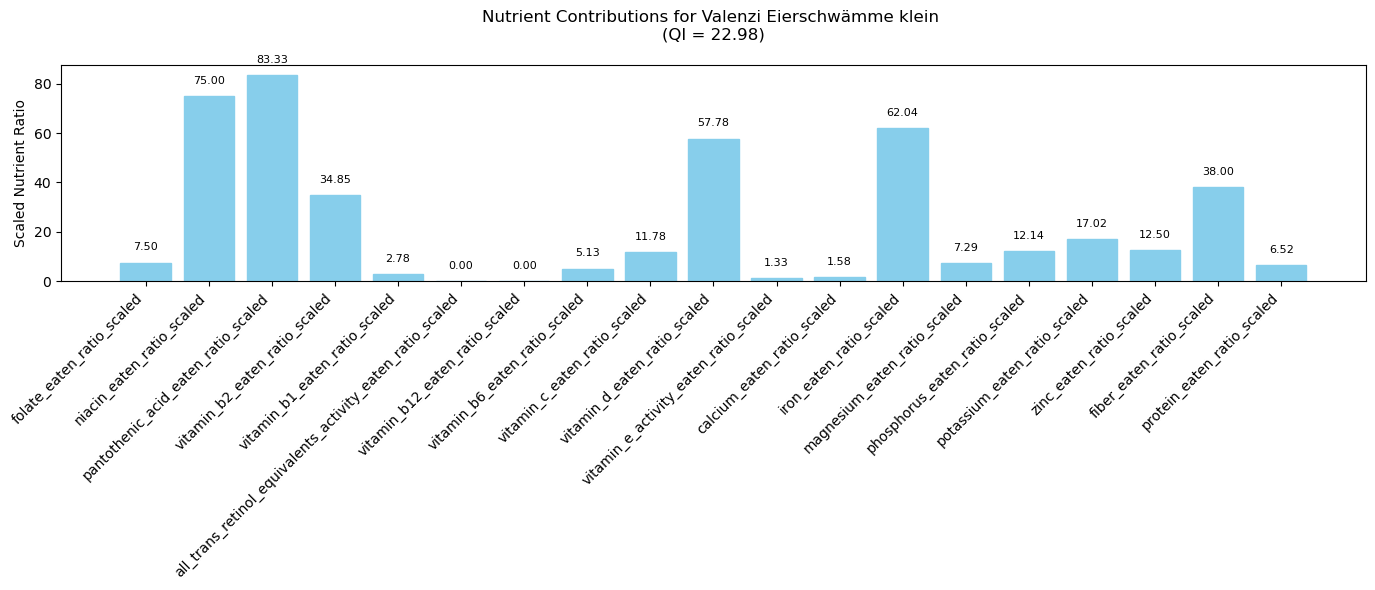

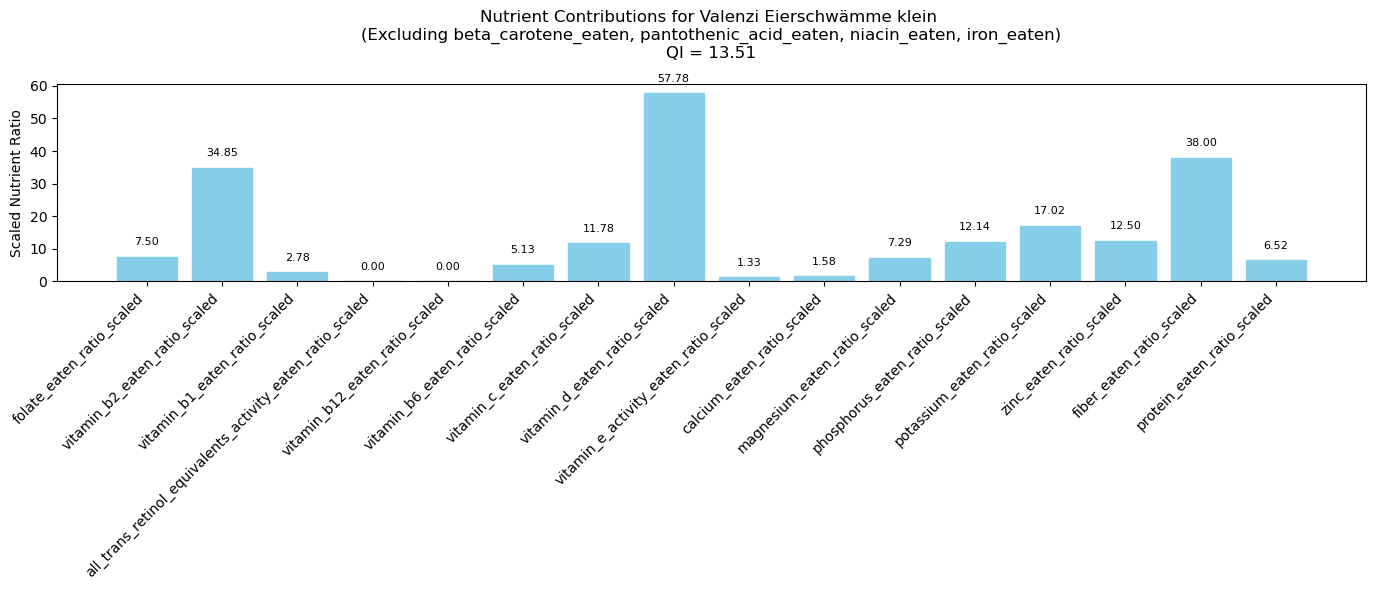

,Nutrient Excluded,QI (incl.),QI (excl.),Absolute Change,Percent Change
2,pantothenic_acid_eaten,22.977611,19.624515,3.353096,14.592883
1,niacin_eaten,22.977611,20.087478,2.890133,12.578039
12,iron_eaten,22.977611,20.807642,2.169968,9.443837
9,vitamin_d_eaten,22.977611,21.044268,1.933343,8.414028
17,fiber_eaten,22.977611,22.143033,0.834577,3.632132
3,vitamin_b2_eaten,22.977611,22.318118,0.659493,2.870155
15,potassium_eaten,22.977611,23.308518,-0.330907,-1.440130
16,zinc_eaten,22.977611,23.559700,-0.582089,-2.533290
14,phosphorus_eaten,22.977611,23.579541,-0.601931,-2.619640
8,vitamin_c_eaten,22.977611,23.599823,-0.622213,-2.707910


In [30]:
food_item = high_qi_vegetable[high_qi_vegetable['combined_name'] == 'Valenzi Eierschwämme klein'].iloc[0]

plot_nutrient_contributions_with_qi(food_item, qualifying_nutrients)
plot_nutrient_contributions_with_qi(food_item, qualifying_nutrients, exclude_list=['beta_carotene_eaten', 'pantothenic_acid_eaten', 'niacin_eaten', 'iron_eaten'])

qi_including = food_item['QI']
results = []

for nutr in qualifying_nutrients:
    qi_excluding = compute_qi_excluding(food_item, qualifying_nutrients, exclude=nutr, scaling_factor=2000)
    abs_diff = qi_including - qi_excluding
    pct_diff = (abs_diff / qi_including) * 100
    results.append({
        'Nutrient Excluded': nutr,
        'QI (incl.)': qi_including,
        'QI (excl.)': qi_excluding,
        'Absolute Change': abs_diff,
        'Percent Change': pct_diff
    })


df_results = pd.DataFrame(results)
df_results.sort_values('Absolute Change', ascending=False)

In [31]:
"""
row = high_qi_vegetable[high_qi_vegetable['combined_name'] == 'Valenzi Eierschwämme klein'].iloc[0]

exclude_list = ['beta_carotene_eaten', 'pantothenic_acid_eaten', 'niacin_eaten', 'iron_eaten']

qi_excl = compute_qi_excluding_multiple(row, qualifying_nutrients, exclude_list, scaling_factor=2000)
print(f"QI excluding {exclude_list}: {qi_excl:.2f}")"
"""

'\nrow = high_qi_vegetable[high_qi_vegetable[\'combined_name\'] == \'Valenzi Eierschwämme klein\'].iloc[0]\n\nexclude_list = [\'beta_carotene_eaten\', \'pantothenic_acid_eaten\', \'niacin_eaten\', \'iron_eaten\']\n\nqi_excl = compute_qi_excluding_multiple(row, qualifying_nutrients, exclude_list, scaling_factor=2000)\nprint(f"QI excluding {exclude_list}: {qi_excl:.2f}")"\n'

In [32]:
high_qi_vegetable[high_qi_vegetable['combined_name'] == 'Pancho Villa Sliced Jalapeños'][[i for i in high_qi_vegetable.columns if '_ratio_scaled' in i]].T

,465370
folate_eaten_ratio_scaled,0.000000
niacin_eaten_ratio_scaled,89.285714
pantothenic_acid_eaten_ratio_scaled,0.000000
vitamin_b2_eaten_ratio_scaled,128.787879
vitamin_b1_eaten_ratio_scaled,45.138889
all_trans_retinol_equivalents_activity_eaten_ratio_scaled,0.000000
vitamin_b12_eaten_ratio_scaled,0.000000
vitamin_b6_eaten_ratio_scaled,0.000000
vitamin_c_eaten_ratio_scaled,0.000000
vitamin_d_eaten_ratio_scaled,0.000000


In [33]:
row = high_qi_vegetable[high_qi_vegetable['combined_name'] == 'Pancho Villa Sliced Jalapeños'].iloc[0]

exclude_list = ['vitamin_b2_eaten', 'iron_eaten', 'niacin_eaten']

qi_excl = compute_qi_excluding_multiple(row, qualifying_nutrients, exclude_list, scaling_factor=2000)
print(f"QI excluding {exclude_list}: {qi_excl:.2f}")

AttributeError: 'dict' object has no attribute 'remove'

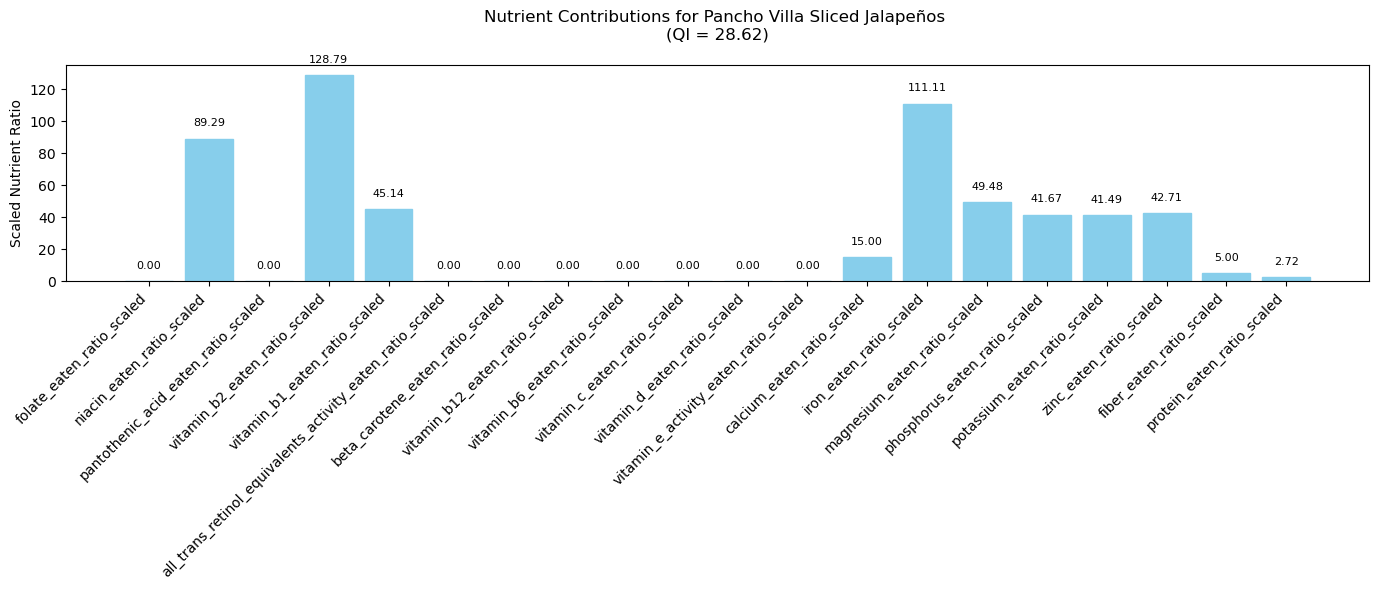

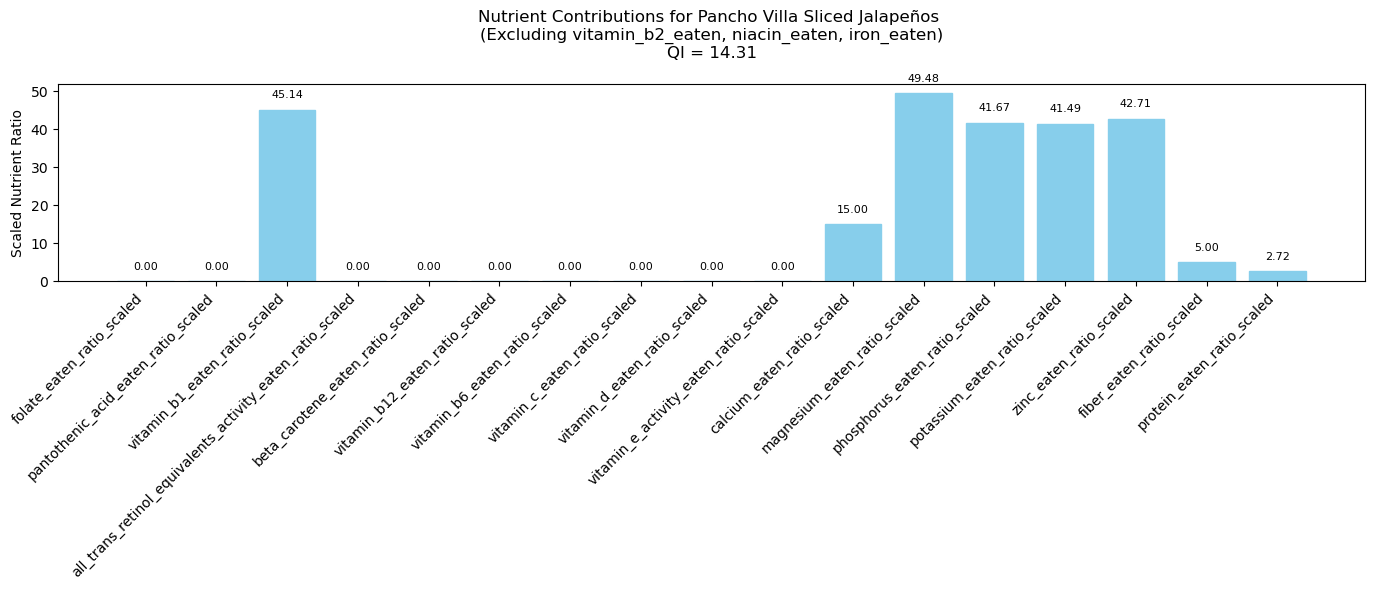

,Nutrient Excluded,QI (incl.),QI (excl.),Absolute Change,Percent Change
3,vitamin_b2_eaten,28.619226,23.347191,5.272034,18.421303
13,iron_eaten,28.619226,24.277547,4.341678,15.170495
1,niacin_eaten,28.619226,25.426253,3.192973,11.156742
14,magnesium_eaten,28.619226,27.521334,1.097892,3.836203
4,vitamin_b1_eaten,28.619226,27.749770,0.869456,3.038014
17,zinc_eaten,28.619226,27.877694,0.741532,2.591027
15,phosphorus_eaten,28.619226,27.932518,0.686707,2.399462
16,potassium_eaten,28.619226,27.941850,0.677376,2.366855
12,calcium_eaten,28.619226,29.336027,-0.716801,-2.504615
18,fiber_eaten,28.619226,29.862343,-1.243117,-4.343644


In [ ]:
food_item = high_qi_vegetable[high_qi_vegetable['combined_name'] == 'Pancho Villa Sliced Jalapeños'].iloc[0]

plot_nutrient_contributions_with_qi(food_item, qualifying_nutrients)
plot_nutrient_contributions_with_qi(food_item, qualifying_nutrients, exclude_list=['vitamin_b2_eaten', 'niacin_eaten', 'iron_eaten'])

qi_including = food_item['QI']
results = []

for nutr in qualifying_nutrients:
    qi_excluding = compute_qi_excluding(food_item, qualifying_nutrients, exclude=nutr, scaling_factor=2000)
    abs_diff = qi_including - qi_excluding
    pct_diff = (abs_diff / qi_including) * 100
    results.append({
        'Nutrient Excluded': nutr,
        'QI (incl.)': qi_including,
        'QI (excl.)': qi_excluding,
        'Absolute Change': abs_diff,
        'Percent Change': pct_diff
    })


df_results = pd.DataFrame(results)
df_results.sort_values('Absolute Change', ascending=False)